# Import Packages

In [106]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<hr>

# Load and Verify Training Dataset 

In [107]:
# Read csv file into dataframe
dfTitanic = pd.read_csv("../../data/titanic/train.csv")

In [108]:
# Check shape of dataframe
dfTitanic.shape

(891, 12)

In [109]:
# Check first few observations in data frame
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<hr>

# Perform Initial EDA

### Q. What is the definition of each variable?

Variable Definitions:
1. **PassengerId:** Record ID
2. **Survived:** Survival (0 = No; 1 = Yes)
3. **Pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
4. **Sex:** Sex
5. **Age:** Age
6. **SibSp:** Number of Siblings/Spouses Aboard
7. **Parch:** Number of Parents/Children Aboard
8. **Ticket:** Ticket Number
9. **Fare:** Passenger Fare
10. **Cabin:** Cabin
11. **Embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Special Notes:
* Pclass is a proxy for socio-economic status (SES): 1st=Upper; 2nd=Middle; 3rd=Lower.
* Age is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5.
* With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch:
    * **Sibling:** Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic.
    * **Spouse:** Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored).
    * **Parent:** Mother or Father of Passenger Aboard Titanic.
    * **Child:** Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic.
* Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.
* Some children travelled only with a nanny, therefore parch=0 for them.
* As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

*Source: https://www.kaggle.com/c/titanic/data*


### Q. Is each variable categorical or continuous?

Variable Types:
1. **PassengerId:** Categorical (Ordinal)
2. **Survived:** Categorical (Nominal)
3. **Pclass:** Categorical (Ordinal)
4. **Sex:** Categorical (Nominal)
5. **Age:** Continuous
6. **SibSp:** Categorical (Ordinal)
7. **Parch:** Categorical (Ordinal)
8. **Ticket:** Categorical (Nominal)
9. **Fare:** Continuous
10. **Cabin:** Categorical (Nominal)
11. **Embarked:** Categorical (Nominal)

Note: See analysis below for details.
<br><br>

In [110]:
# Check data type for each variable
dfTitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Age and Fare appear to be continuous variables. Let's check the unique values for all other variables to verify they are categorical.  We can also use this information to determine if a categorical variable is nominal or ordinal.

In [111]:
# Get unique values for PassengerId
dfTitanic.PassengerId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

PassengerId is an ordinal variable that most likely indicates the chronological order in which they were added to the data set.

In [112]:
# Get unique values for Survived
dfTitanic.Survived.unique()

array([0, 1], dtype=int64)

Survived is a nominal (binary) variable.

In [113]:
# Get unique values for Pclass
dfTitanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

Pclass is an ordinal variable in that class 1 ranks higher than class 2 which ranks higher than class 3.

In [114]:
# Get unique values for Sex
dfTitanic.Sex.unique()

array(['male', 'female'], dtype=object)

Sex is a nominal (binary) variable.

In [115]:
# Get unique values for Age
dfTitanic.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

Age is a continuous variable - ratios hold among values (i.e., a 20 year-old can be described as twice as old as a 10 year-old).

In [116]:
# Get unique values for SibSp
dfTitanic.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

SibSp is an ordinal variable in that records can be ordered by the number of siblings/spouses aboard. However, we can say that ratios do hold among the values (i.e., having 4 siblings aboard is twice as many 2 siblings). Therefore, it is worth looking at the frequency of each value to determine if this variable is normally distributed. If so, it may be worth treating as a continuous variable despite being zero-bounded.

In [117]:
# Get frequency of each value
dfTitanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

SibSp is heavily right-skewed with a mode of zero.  As a result, we cannot use treat this variable as continuous if performing a linear regression as it would violate the normality assumption.

In [118]:
# Get unique values for Parch
dfTitanic.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

Parch is an ordinal variable because it allows records to be ordered by the number of parents/children aboard.  This variable is similar to SibSp, so let's take a look at the frequency distribution.

In [119]:
# Get frequency of each value
dfTitanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Parch - like SibSp - has mode of zero, is highly right-skewed, and is zero-bounded; therefore, it non-normally distributed and is not a good candidate as a continuous variable if performing a linear regression.

In [120]:
# Get unique values for Ticket
dfTitanic.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Ticket is a nominal variable. Although there may be some implicit ordering in the ticket numbers assigned, the presence of ticket IDs such as 'SOTON/OQ 392076' and '349248' make it difficult to decipher as we know there were not 300,000+ passengers aboard the Titanic.

It's possible there some sort of leveled code for ticket number assignments - i.e., 0-999 purchased in one location, 1000-1099 puchased in another, etc.  The string prefixes, such as 'SOTON/O.Q.' may indicate where the ticket was puchased (i.e. SOTON = Southampton, England) and could be used to pursue this possiblity.

In [121]:
# Get unique values for Fare
dfTitanic.Fare.unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

Fare is a continuous variable. Someone who paid 100 dollars can be said to have paid 10 times as someone who puchased the same ticket for 10 dollars.

In [122]:
# Get unique values for Cabin
dfTitanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

Cabin is a nominal variable. Although the cabin letters are categorical in nature (i.e., A is probably correlated with 1st class), there is no orderable difference among the room numbers with a given letter.

It may prove worthwhile to create a new variable, CabinLevel, to pusue this idea.

In [123]:
# Get unique values for Embarked
dfTitanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Embarked is a nominal variable in that no port ranks above any other port.

### Q. Are there missing values?

Age is missing 177 values.

Cabin is missing 687 values.

Embarked is missing 2 values.

In [124]:
# Review dataframe info to get value counts for each variable
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [125]:
# Verify missing values in Age
dfTitanic[dfTitanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [126]:
# Verify missing values in Cabin
dfTitanic[dfTitanic.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [127]:
# Verify missing values in Embarked
dfTitanic[dfTitanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Q. What is the (1) Min, (2) Max, (3) Mean, and (4) Standard Deviation for each continuous variable?

This table displays the min, max, mean, and std for our two continuous variables, Age and Fare.  It should be noted that the values for Age are based 177 missing variables. We will explore strategies for handling missing variables below, and subsequently, will re-query these properties of Age.

Var | Min | Max | Mean | Std
--- | --- | --- | --- | ---
Age | 0.420000 | 80.000000 | 29.699118 | 14.526497
Fare | 0.000000 | 512.329200 | 32.204208 | 49.693429

In [128]:
# Use describe method to obtain min, max, mean, and std
dfTitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<hr>

# Handle Missing Data

### Q. What is the (1) Min, (2) Max, (3) Mean, and (4) Standard Deviation for Age after filling null Age values with the average of non-null Age values?

This table compares the min, max, mean, and std values for Age before and after filling null values with the average of non-null values. Because null values were initially ignored, they did not affect the min or max on the second run. Furthermore, we replaced null values with the average of the non-null values, so the mean was not affected on the second run.  The standard deviation was reduced by 1.524482 on the second run, however, which had the affect of reducing the spread of the Age data.

Age | Min | Max | Mean | Std
--- | --- | --- | --- | ---
With Nulls | 0.420000 | 80.000000 | 29.699118 | 14.526497
Without Nulls | 0.420000 | 80.000000 | 29.699118 | 13.002015

In [129]:
# Create a new data frame
dfAgeAvg = dfTitanic

In [130]:
# Take average of non-null Age values
avgAge = dfAgeAvg.Age.mean()

In [131]:
# Fill null Age values with average age value
dfAgeAvg.Age = dfAgeAvg.Age.fillna(value = avgAge)

In [132]:
# Verify there are no null Age values
dfAgeAvg[dfAgeAvg.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [133]:
# Use describe method to obtain new min, max, mean, and std for Age
dfAgeAvg.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<hr>

# Plot Distributions

### Q. What is the graphic distribution for each variable?

**PassengerId**

Each passenger ID is a unique value and a in a 1:1 correspondence with each passenger.  Therefore, there is little to be gained by plotting this data.

**Survived**

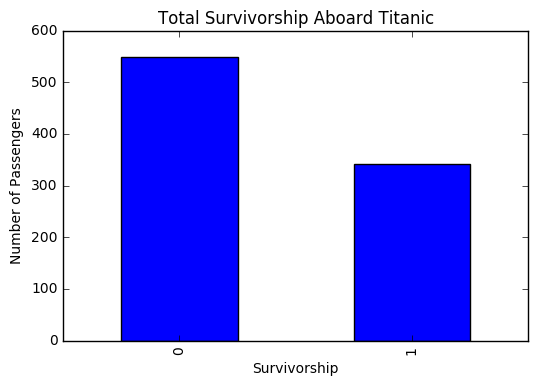

In [217]:
# Bar Chart
plot = dfTitanic.Survived.value_counts().plot(kind='bar', title='Total Survivorship Aboard Titanic')
plot.set(ylabel='Number of Passengers', xlabel='Survivorship')

**Pclass**

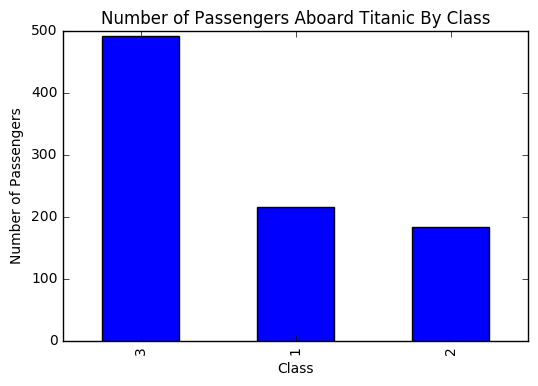

In [216]:
# Histogram
plot = dfTitanic.Pclass.value_counts().plot(kind='bar', title='Number of Passengers Aboard Titanic By Class')
plot.set(ylabel='Number of Passengers', xlabel='Class')

**Sex**

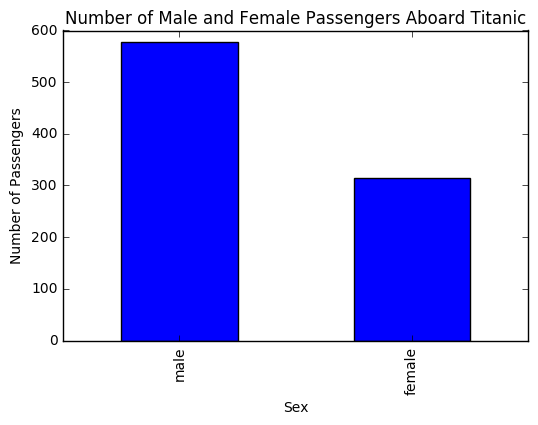

In [215]:
# Bar Chart
plot = dfTitanic.Sex.value_counts().plot(kind='bar', title='Number of Male and Female Passengers Aboard Titanic')
plot.set(ylabel='Number of Passengers', xlabel='Sex')

**Age**

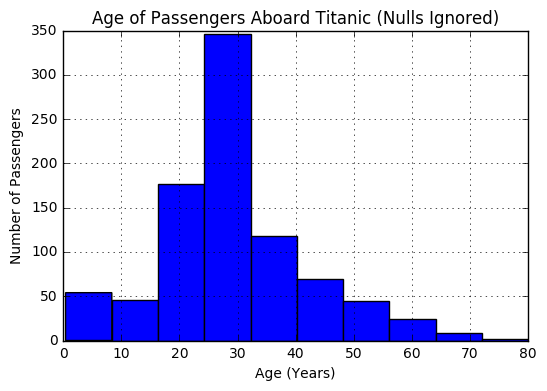

In [219]:
# Histogram (ignore nulls)
hist = dfTitanic.Age.hist()
hist.set(xlabel='Age (Years)', ylabel='Number of Passengers', title='Age of Passengers Aboard Titanic (Nulls Ignored)')

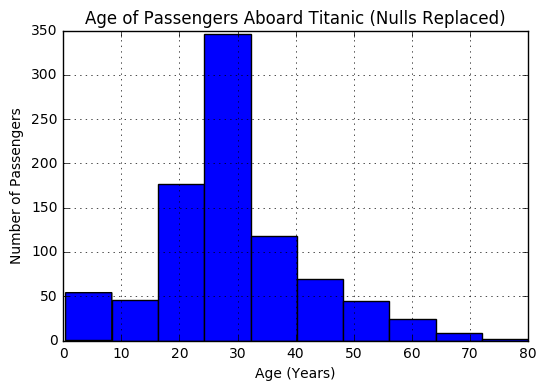

In [222]:
# Histogram (replace nulls)
hist = dfAgeAvg.Age.hist()
hist.set(xlabel='Age (Years)', ylabel='Number of Passengers', title='Age of Passengers Aboard Titanic (Nulls Replaced)')

**SibSp**

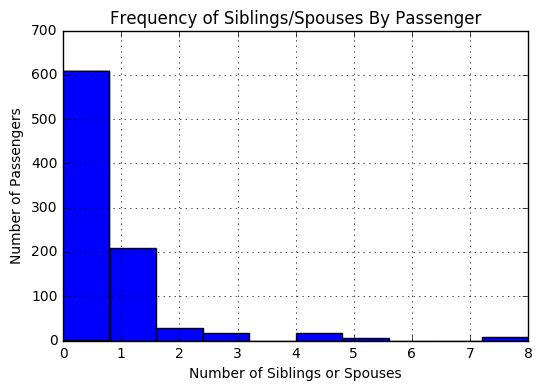

In [224]:
# Histogram
hist = dfTitanic.SibSp.hist()
hist.set(ylabel='Number of Passengers', xlabel='Number of Siblings or Spouses', title='Frequency of Siblings/Spouses By Passenger')

**Parch**

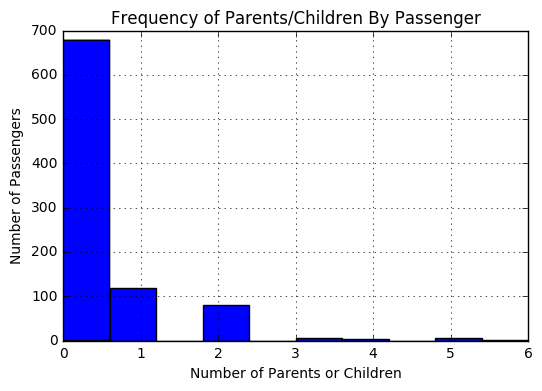

In [225]:
# Histogram
hist = dfTitanic.Parch.hist()
hist.set(ylabel='Number of Passengers', xlabel='Number of Parents or Children', title='Frequency of Parents/Children By Passenger')

**Ticket**

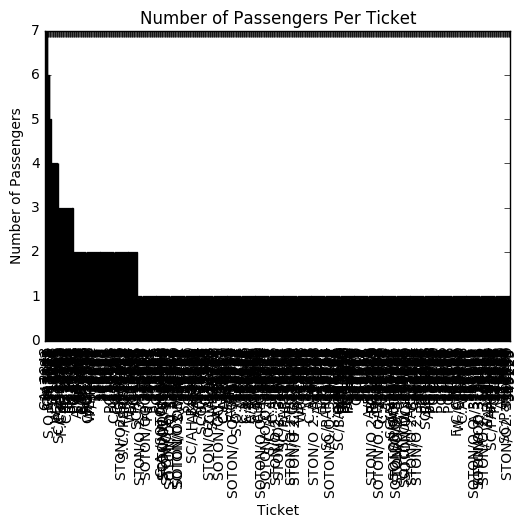

In [231]:
# Bar Chart
plot = dfTitanic.Ticket.value_counts().plot(kind='bar', title='Number of Passengers Per Ticket')
plot.set(ylabel='Number of Passengers', xlabel='Ticket')

**Fare**

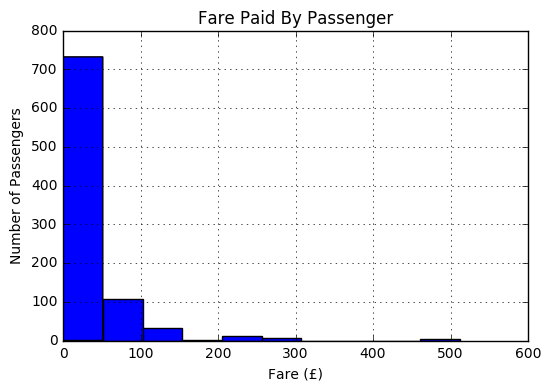

In [227]:
# Histogram
hist = dfTitanic.Fare.hist()
hist.set(ylabel='Number of Passengers', xlabel='Fare (£)', title='Fare Paid By Passenger')

**Cabin**

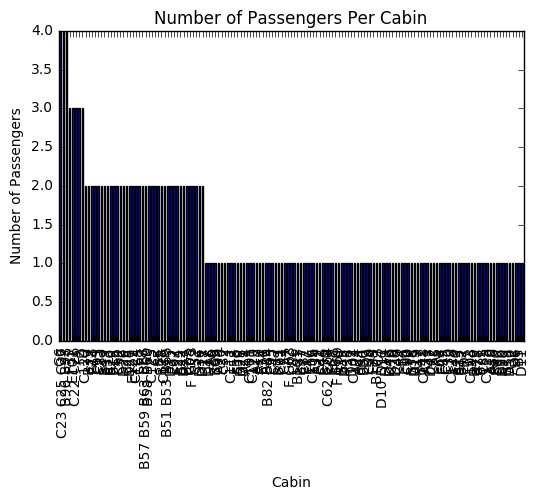

In [228]:
# Bar Chart
plot = dfTitanic.Cabin.value_counts().plot(kind='bar', title='Number of Passengers Per Cabin')
plot.set(ylabel='Number of Passengers', xlabel='Cabin')

**Embarked**

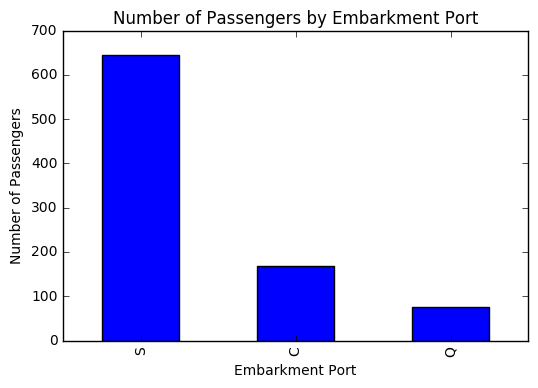

In [230]:
# Bar Chart
plot = dfTitanic.Embarked.value_counts().plot(kind='bar', title='Number of Passengers by Embarkment Port')
plot.set(ylabel='Number of Passengers', xlabel='Embarkment Port')

<hr>

# Follow Up EDA

### Q. How does female and male adult survivorship compare?

 (0, 500),

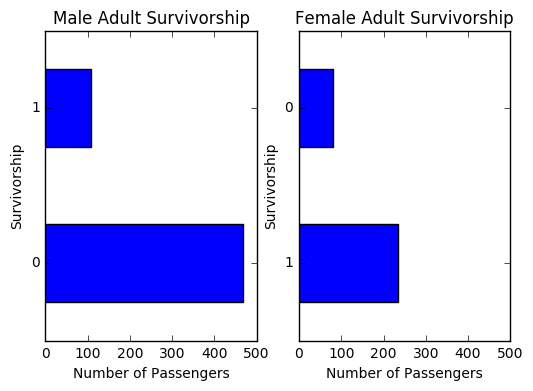

In [245]:
fig, axs = plt.subplots(1,2)
malePlot = dfTitanic[dfTitanic.Sex=='male'].Survived.value_counts().plot(kind='barh', ax=axs[0], title='Male Adult Survivorship')
malePlot.set(ylabel='Survivorship', xlabel='Number of Passengers', xlim=([0,500]))
femalePlot = dfTitanic[dfTitanic.Sex=='female'].Survived.value_counts().plot(kind='barh', ax=axs[1], title='Female Adult Survivorship')
femalePlot.set(ylabel='Survivorship', xlabel='Number of Passengers', xlim=([0,500]))

### Q. How does female and male child survivorship compare?

 (0, 50),

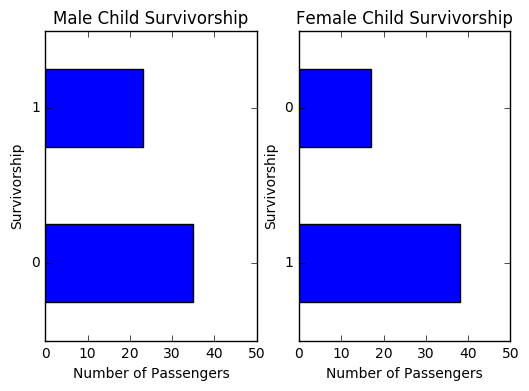

In [251]:
fig, axs = plt.subplots(1,2)
malePlot = dfTitanic[(dfTitanic.Age<18) & (dfTitanic.Sex=='male')].Survived.value_counts().plot(kind='barh', ax=axs[0], title='Male Child Survivorship')
malePlot.set(ylabel='Survivorship', xlabel='Number of Passengers', xlim=([0,50]))
femalePlot = dfTitanic[(dfTitanic.Age<18) & (dfTitanic.Sex=='female')].Survived.value_counts().plot(kind='barh', ax=axs[1], title='Female Child Survivorship')
femalePlot.set(ylabel='Survivorship', xlabel='Number of Passengers', xlim=([0,50]))

### Q. How does child survivorship compare to adult survivorship?

 (0, 550),

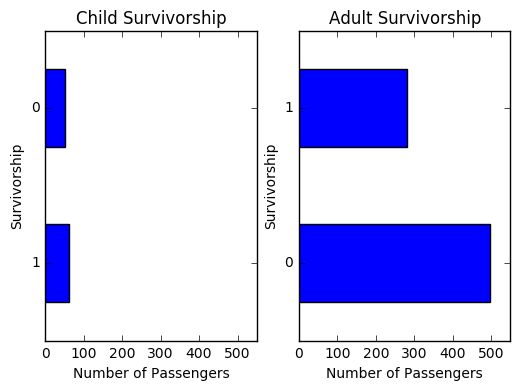

In [257]:
fig, axs = plt.subplots(1,2)
childPlot = dfTitanic[(dfTitanic.Age<18)].Survived.value_counts().plot(kind='barh', ax=axs[0], title='Child Survivorship')
childPlot.set(ylabel='Survivorship', xlabel='Number of Passengers', xlim=([0,550]))
adultPlot = dfTitanic[(dfTitanic.Age>=18)].Survived.value_counts().plot(kind='barh', ax=axs[1], title='Adult Survivorship')
adultPlot.set(ylabel='Survivorship', xlabel='Number of Passengers', xlim=([0,550]))

### Q. How does survivorship compare across passenger classes?

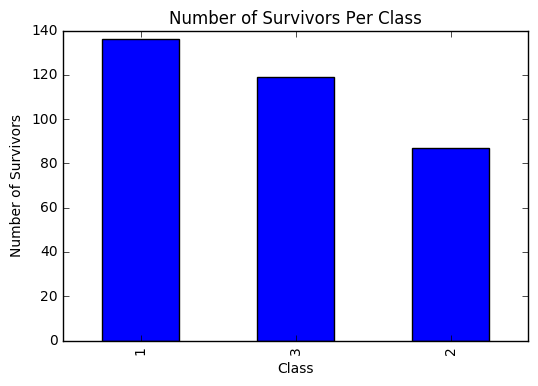

In [278]:
plot = dfTitanic[dfTitanic.Survived==1].Pclass.value_counts().plot(kind='bar', title='Number of Survivors Per Class')
plot.set(ylabel='Number of Survivors', xlabel='Class')